(bcg_incomplete_final)=
```{raw} html
<div id="qe-notebook-header" align="right" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" width="250px" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>
```

# Equilibrium Capital Structures with Incomplete Markets

```{contents} Contents
:depth: 2
```

In addition to what's in Anaconda, this lecture will need the following libraries:

In [1]:
!pip install --upgrade quantecon
!pip install interpolation
!conda install -y -c plotly plotly plotly-orca

Requirement already up-to-date: quantecon in /Users/matthewmckay/anaconda3/envs/quantecon/lib/python3.8/site-packages (0.4.8)


\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

done
Solving environment: \ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

done




==> WARNING: A newer version of conda exists. <==
  current version: 4.8.5
  latest version: 4.9.0

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.



## Introduction

This is an extension of an earlier lecture {doc}`BCG_complete_mkts <BCG_complete_mkts>` about a **complete markets**
model.

In contrast to that lecture, this one  describes an instance of a model authored by Bisin, Clementi, and Gottardi {cite}`BCG_2018`
in which financial markets are **incomplete**.

Instead of being able to trade equities and a full set of one-period
Arrow securities as they can in {doc}`BCG_complete_mkts <BCG_complete_mkts>`, here consumers and firms trade only equity and a bond.

It is useful to watch how outcomes differ  in the two settings.

In the complete markets economy in {doc}`BCG_complete_mkts <BCG_complete_mkts>`

- there is a unique  stochastic discount factor that prices all assets
- consumers’ portfolio choices are indeterminate
- firms' financial structures are indeterminate, so the model embodies an instance of a Modigliani-Miller irrelevance theorem {cite}`Modigliani_Miller_1958`
- the aggregate of all firms' financial structures are indeterminate, a consequence of there being redundant assets

In the incomplete markets economy studied here

- there is a not a unique equilibrium stochastic discount factor
- different stochastic discount factors price different assets
- consumers’ portfolio choices are determinate
- while **individual** firms' financial structures are indeterminate, thus conforming to part of a Modigliani-Miller theorem,
  {cite}`Modigliani_Miller_1958`, the **aggregate**  of all firms' financial structures **is** determinate.

A  `Big K, little k` analysis played an important role in the  previous lecture {doc}`BCG_complete_mkts <BCG_complete_mkts>`.

A more subtle version of a `Big K, little k`   features in  the   BCG incomplete markets environment here.

We use it to convey the heart of what BCG call a **rational conjectures** equilibrium in which conjectures are about
equilibrium pricing functions in regions of the state space that  an average consumer or firm does not visit in equilibrium.

Note that the absence of complete markets means that we can compute competitive equilibrium prices and allocations by first solving
the simple planning problem that we did in {doc}`BCG_complete_mkts <BCG_complete_mkts>`.

Instead, we compute an equilibrium by solving a system of simultaneous inequalities.

(Here we do not address the interesting question of whether there is a *different* planning problem that we could use to compute a
competitive equlibrium allocation.)

### Setup

We adopt specifications of preferences and technologies used by Bisin,
Clemente, and Gottardi (2018) {cite}`BCG_2018` and in our earlier lecture on a complete markets
version of their model.

The economy lasts for two periods, $t=0, 1$.

There are two types of consumers named $i=1,2$.

A scalar random variable $\epsilon$ affects both

- a representative firm’s physical return $f(k)e^\epsilon$ in
  period $1$ from investing $k \geq 0$ in capital in period
  $0$.
- period $1$ endowments $w_1^i(\epsilon)$ of the
  consumption good for agents $i =1$ and $i=2$.

### Ownership

A consumer of type $i$ is endowed with $w_0^i$ units of the
time $0$ good and $w_1^i(\epsilon)$ of the time $1$
good when the random variable takes value $\epsilon$.

At the start of period $0$, a consumer of type $i$ also owns
$\theta^i_0$ shares of a representative firm.

### Measures of agents and firms

As in the companion lecture {doc}`BCG_complete_mkts <BCG_complete_mkts>` that studies a complete markets version of
the model, we follow BCG in assuming that there are unit measures of

- consumers of type $i=1$
- consumers of type $i=2$
- firms with access to a production technology that converts
  $k$ units of time $0$ good into
  $A k^\alpha e^\epsilon$ units of the time $1$ good in
  random state $\epsilon$

Thus, let $\omega \in [0,1]$ index a particular consumer of type
$i$.

Then define Big $C^i$ as

$$
C^i = \int_0^1 c^i(\omega) d \, \omega
$$

with components

$$
\begin{aligned}
C^i_0  & =  \int_0^1 c^i_0(\omega) d \, \omega \cr
C^i_1(\epsilon) &  = \int_0^1 c^i_1(\epsilon;\omega) d \, \omega
\end{aligned}
$$

In the same spirit, let $\zeta \in [0,1]$ index a particular firm
and let firm $\zeta$ purchase $k(\zeta)$ units of capital
and issue $b(\zeta)$ bonds.

Then define Big $K$ and Big $B$ as

$$
K = \int_0^1 k(\zeta) d \, \zeta, \quad B = \int_0^1 b(\zeta) d \, \zeta
$$

The assumption that there are equal measures of our three types of
agents justifies our assumption that  each individual agent is a
powerless **price taker**:

- an individual consumer chooses its own (infinitesimal) part
  $c^i(\omega)$ of $C^i$ taking prices as given
- an individual firm chooses its own (infinitesmimal) part
  $k(\zeta)$ of $K$ and $b(\zeta)$ of $B$
  taking pricing functions as given
- However, equilibrium prices depend on the `Big K, Big B, Big C`
  objects $K$, $B$, and $C$

The assumption about measures of agents is a powerful device for making
a host of competitive agents take as given the equilibrium prices that
turn out to be determined by the decisions of hosts of agents who are just like
them.

We call an equilibrium **symmetric** if

- all type $i$ consumers choose the same consumption profiles so
  that $c^i(\omega) = C^i$ for all $\omega \in [0,1]$
- all firms choose the same levels of $k$ and $b$ so that
  $k(\zeta) = K$, $b(\zeta) = B$ for all
  $\zeta \in [0,1]$

In this lecture, we restrict ourselves to describing symmetric
equilibria.

### Endowments

Per capital economy-wide endowments in periods $0$ and $1$ are

$$
\begin{aligned}
w_0 & = w_0^1 + w_0^2 \cr
w_1(\epsilon) & =  w_1^1(\epsilon) + w_1^2(\epsilon) \textrm{ in state }\epsilon
\end{aligned}
$$

### Feasibility:

Where $\alpha \in (0,1)$ and $A >0$

$$
\begin{aligned}
 C_0^1 + C_0^2 & = w_0^1 + w_0^2 - K \cr
 C_1^1(\epsilon) + C_1^2(\epsilon) & =  w_1^1(\epsilon) + w_1^2(\epsilon) + e^\epsilon \int_0^1 f(k(\zeta)) d \zeta, \quad k \geq 0
\end{aligned}
$$

where $f(k) = A k^\alpha, A >0, \alpha \in (0,1)$.

### Parameterizations

Following BCG, we shall employ the following parameterizations:

$$
\begin{aligned}
\epsilon & \sim {\mathcal N}(\mu, \sigma^2) \cr
u(c) & = \frac{c^{1-\gamma}}{1 - \gamma} \cr
w_1^i(\epsilon) & = e^{- \chi_i \mu - .5 \chi_i^2 \sigma^2 + \chi_i \epsilon} , \quad \chi_i \in [0,1]
\end{aligned}
$$

Sometimes instead of asuming $\epsilon \sim g(\epsilon) = {\mathcal N}(0,\sigma^2)$,
we’ll assume that $g(\cdot)$ is a probability
mass function that serves as a discrete approximation to a standardized
normal density.

### Preferences:

A consumer of type $i$ orders period $0$ consumption
$c_0^i$ and state $\epsilon$-period $1$ consumption
$c^i(\epsilon)$ by

$$
u^i = u(c_0^i) + \beta \int u(c_1^i(\epsilon)) g (\epsilon) d \epsilon, \quad i = 1,2
$$

$\beta \in (0,1)$ and the one-period utility function is

$$
u(c) = \begin{cases}
\frac{c^{1 -\gamma}} { 1 - \gamma} & \textrm{if  } \gamma \neq 1 \\
\log c & \textrm{if  } \gamma = 1
\end{cases}
$$

### Risk-sharing motives

The two types of agents’ period $1$ endowments have different correlations with
the physical return on capital.

Endowment differences give agents incentives to trade risks that in the
complete market version of the model showed up in their demands for
equity and in their demands and supplies of one-period Arrow securities.

In the incomplete-markets setting under study here, these differences
show up in differences in the two types of consumers’ demands for a
typical firm’s bonds and equity, the only two assets that agents can now
trade.

## Asset Markets

Markets are incomplete: *ex cathedra* we the model builders declare that only equities and bonds issued by representative
firms can be traded.

Let $\theta^i$ and $\xi^i$ be a consumer of type
$i$’s post-trade holdings of equity and bonds, respectively.

A firm issues bonds promising to pay $b$ units of consumption at
time $t=1$ and purchases $k$ units of physical capital at
time $t=0$.

When $e^\epsilon A k^\alpha < b$ at time $1$, the firm defaults and its output is
divided equally among bondholders.

Evidently, when the productivity shock
$\epsilon < \epsilon^* = \log \left(\frac{b}{ Ak^\alpha}\right)$,
the firm defaults on its debt

Payoffs to equity and debt at date 1 as functions of the productivity
shock $\epsilon$ are thus

```{math}
:label: payofffns

\begin{aligned}
d^e(k,b;\epsilon) &= \max \left\{ e^\epsilon  A k^\alpha - b, 0 \right\} \\
d^b(k,b;\epsilon) &= \min \left\{ \frac{e^\epsilon  A k^\alpha}{b}, 1 \right\}
\end{aligned}
```

A firm faces a bond price function $p(k,b)$ when it issues
$b$ bonds and purchases $k$ units of physical capital.

A firm’s equity is worth $q(k,b)$ when it issues $b$ bonds
and purchases $k$ units of physical capital.

A firm regards an equity-pricing function $q(k,b)$ and a bond
pricing function $p(k,b)$ as exogenous in the sense that they are
not affected by its choices of $k$ and $b$.

Consumers face equilibrium prices $\check q$ and $\check p$
for bonds and equities, where $\check q$ and $\check p$ are
both scalars.

Consumers are price takers and only need to know the scalars $\check q, \check p$.

Firms are *price function* takers and  must know the functions $q(k,b), p(k,b)$ in order
completely to pose their optimum problems.

### Consumers

Each consumer of type $i$ is endowed with $w_0^i$ of the
time $0$ consumption good, $w_1^i(\epsilon)$ of the time
$1$, state $\epsilon$ consumption good  and also owns a fraction
$\theta^i_0 \in (0,1)$ of the initial value of a representative
firm, where $\theta^1_0 + \theta^2_0 = 1$.

The initial value of a representative firm is $V$ (an object to be
determined in a rational expectations equilibrium).

Consumer $i$ buys $\theta^i$ shares of equity and buys bonds
worth $\check p \xi^i$ where $\check p$ is the bond price.

Being a price-taker, a consumer takes $V$, $\check q$, $\check p$, and $K, B$
as given.

Consumers know that equilibrium payoff functions for bonds and equities take the form

$$
\begin{aligned}
d^e(K,B;\epsilon) &= \max \left\{ e^\epsilon  A K^\alpha - B, 0 \right\} \\
d^b(K,B;\epsilon) &= \min \left\{ \frac{e^\epsilon  A K^\alpha}{B}, 1 \right\}
\end{aligned}
$$

Consumer $i$’s optimization problem is

$$
\begin{aligned}
\max_{c^i_0,\theta^i,\xi^i,c^i_1(\epsilon)} & u(c^i_0) + \beta \int u(c^i(\epsilon)) g(\epsilon) \ d\epsilon \\
\text{subject to } \quad
& c^i_0 = w^i_0 + \theta^i_0V - \check q\theta^i - \check p \xi^i, \\
& c^i_1(\epsilon) = w^i_1(\epsilon) + \theta^i d^e(K,B;\epsilon) + \xi^i d^b(K,B;\epsilon) \ \forall \ \epsilon, \\
& \theta^i \geq 0, \xi^i \geq 0.
\end{aligned}
$$

The last two inequalities impose that the consumer cannot short sell either
equity or bonds.

In a rational expectations equilibrium, $\check q = q(K,B)$ and $\check p = p(K,B)$

We form consumer $i$’s Lagrangian:

$$
\begin{aligned}
L^i := &  u(c^i_0) + \beta \int u(c^i(\epsilon)) g(\epsilon) \ d\epsilon  \\
     & +\lambda^i_0 [w^i_0 + \theta_0V - \check q\theta^i - \check p \xi^i - c^i_0]  \\
     & +  \beta \int \lambda^i_1(\epsilon) \left[ w^i_1(\epsilon) + \theta^i d^e(K,B;\epsilon) + \xi^i d^b(K,B;\epsilon) - c^i_1(\epsilon) \right] g(\epsilon) \ d\epsilon
\end{aligned}
$$

Consumer $i$’s first-order necessary conditions for an optimum
include:

$$
\begin{aligned}
c^i_0:& \quad u^\prime(c^i_0) = \lambda^i_0 \\
c^i_1(\epsilon):& \quad u^\prime(c^i_1(\epsilon)) = \lambda^i_1(\epsilon) \\
\theta^i:& \quad \beta \int \lambda^i_1(\epsilon) d^e(K,B;\epsilon) g(\epsilon) \ d\epsilon \leq \lambda^i_0 \check q \quad (= \ \ \text{if} \ \ \theta^i>0) \\
\xi^i:& \quad \beta \int \lambda^i_1(\epsilon) d^b(K,B;\epsilon) g(\epsilon) \ d\epsilon \leq \lambda^i_0 \check p \quad (= \ \ \text{if} \ \ b^i>0) \\
\end{aligned}
$$

We can combine and rearrange consumer $i$’s first-order
conditions to become:

$$
\begin{aligned}
\check q \geq \beta \int \frac{u^\prime(c^i_1(\epsilon))}{u^\prime(c^i_0)} d^e(K,B;\epsilon) g(\epsilon) \ d\epsilon \quad (= \ \ \text{if} \ \ \theta^i>0) \\
\check p \geq \beta \int \frac{u^\prime(c^i_1(\epsilon))}{u^\prime(c^i_0)} d^b(K,B;\epsilon) g(\epsilon) \ d\epsilon \quad (= \ \ \text{if} \ \ b^i>0)\\
\end{aligned}
$$

These inequalities imply that in a symmetric rational expectations equilibrium  consumption allocations and
prices  satisfy

$$
\begin{aligned}
\check q = \max_i \beta \int \frac{u^\prime(c^i_1(\epsilon))}{u^\prime(c^i_0)} d^e(K,B;\epsilon) g(\epsilon) \ d\epsilon \\
\check p = \max_i \beta \int \frac{u^\prime(c^i_1(\epsilon))}{u^\prime(c^i_0)} d^b(K,B;\epsilon) g(\epsilon) \ d\epsilon \\
\end{aligned}
$$

### Pricing functions

When individual firms solve their optimization problems, they take big
$C^i$’s as fixed objects that they don’t influence.

A representative firm faces a price function $q(k,b)$ for its
equity and a price function $p(k, b)$ per unit of bonds that
satisfy

$$
\begin{aligned}
q(k,b) = \max_i \beta \int \frac{u^\prime(C^i_1(\epsilon))}{u^\prime(C^i_0)} d^e(k,b;\epsilon) g(\epsilon) \ d\epsilon \\
p(k,b) = \max_i \beta \int \frac{u^\prime(C^i_1(\epsilon))}{u^\prime(C^i_0)} d^b(k,b;\epsilon) g(\epsilon) \ d\epsilon \\
\end{aligned}
$$

where the payoff functions are described by equations {eq}`payofffns`.

Notice the appearance of big $C^i$’s on the right sides of these
two equations that define equilibrium pricing functions.

The two price functions describe outcomes not only for equilibrium choices
$K, B$ of capital $k$ and debt $b$, but also for any
**out-of-equilibrium** pairs $(k, b) \neq (K, B)$.

The firm is assumed to know both price functions.

This means that the firm understands that its choice of $k,b$ influences how markets price its equity and debt.

This package of assumptions is sometimes called  **rational conjectures** (about price functions).

BCG give credit to Makowski for emphasizing and clarifying how rational conjectures are components of  rational expectations equilibria.

### Firms

The firm chooses capital $k$ and debt $b$ to maximize its
market value:

$$
V \equiv \max_{k,b} -k + q(k,b) + p(k,b) b
$$

Attributing value maximization to the firm is a good idea because in equilibrium consumers of both types
*want* a firm to maximize its value.

In the special quantitative examples studied here

- consumers of  types $i=1,2$ both  hold equity
- only consumers of type $i=2$ hold debt; consumers of type
  $i=1$ hold none.

These outcomes occur because we follow BCG and set parameters so that a
type 2 consumer’s stochastic endowment of the consumption good in period
$1$ is more correlated with the firm’s output than is a type 1
consumer’s.

This gives consumers of type $2$ a motive to hedge their second period
endowment risk by holding bonds (they also choose to
hold some equity).

These outcomes mean that the pricing functions end up
satisfying

$$
\begin{aligned}
q(k,b) &= \beta \int \frac{u^\prime(C^1_1(\epsilon))}{u^\prime(C^1_0)} d^e(k,b;\epsilon) g(\epsilon) \ d\epsilon = \beta \int \frac{u^\prime(C^2_1(\epsilon))}{u^\prime(C^2_0)} d^e(k,b;\epsilon) g(\epsilon) \ d\epsilon \\
p(k,b) &= \beta \int \frac{u^\prime(C^2_1(\epsilon))}{u^\prime(C^2_0)} d^b(k,b;\epsilon) g(\epsilon) \ d\epsilon \\
\end{aligned}
$$

Recall that
$\epsilon^*(k,b) \equiv \log\left(\frac{b}{Ak^\alpha}\right)$ is a
firm’s default threshold.

We can rewrite the pricing functions as:

$$
\begin{aligned}
q(k,b) &= \beta \int_{\epsilon^*}^\infty \frac{u^\prime(C^i_1(\epsilon))}{u^\prime(C^i_0)} \left( e^\epsilon Ak^\alpha - b \right) g(\epsilon) \ d\epsilon, \quad i=1,2\\
p(k,b) &= \beta \int^{\epsilon^*}_{-\infty} \frac{u^\prime(C^2_1(\epsilon))}{u^\prime(C^2_0)} \left( \frac{e^\epsilon Ak^\alpha}{b} \right) g(\epsilon) \ d\epsilon + \beta \int_{\epsilon^*}^{\infty} \frac{u^\prime(C^2_1(\epsilon))}{u^\prime(C^2_0)} g(\epsilon) \ d\epsilon \\
\end{aligned}
$$

#### Firm’s optimization problem

The firm’s optimization problem is

$$
V \equiv \max_{k,b} \left\{ -k + q(k,b) + p(k, b) b \right\}
$$

The firm’s first-order necessary conditions with respect to $k$
and $b$, respectively, are

$$
\begin{aligned}
k: \quad &   -1 + \frac{\partial q(k,b)}{\partial k} + b \frac{\partial p(q,b)}{\partial k}  = 0 \cr
    b: \quad &  \frac{\partial q(k,b)}{\partial b} + p(k,b) + b \frac{\partial p(k,b)}{\partial b} = 0
\end{aligned}
$$

We use the Leibniz integral rule several times to arrive at
the following derivatives:

$$
\frac{\partial q(k,b)}{\partial k}  = \beta \alpha A k^{\alpha-1} \int_{\epsilon^*}^\infty \frac{u'(C_1^i(\epsilon))}{u'(C_0^i)}
     e^\epsilon g(\epsilon) d \epsilon, \quad i=1,2
$$

$$
\frac{\partial q(k,b)}{\partial b}  = -\beta \int_{\epsilon^*}^\infty \frac{u'(C_1^i(\epsilon))}{u'(C_0^i)} g(\epsilon) d \epsilon, \quad i=1,2
$$

$$
\frac{\partial p(k,b)}{\partial k} =  \beta \alpha \frac{A k^{\alpha -1}}{b} \int_{-\infty}^{\epsilon^*} \frac{u'(C_1^2(\epsilon))}{u'(C_0^2)}   g(\epsilon) d \epsilon
$$

$$
\frac{\partial p(k,b)}{\partial b} = - \beta \frac{A k^\alpha}{b^2} \int_{-\infty}^{\epsilon^*}  \frac{u'(C_1^2(\epsilon))}{u'(C_0^2)} e^\epsilon  g(\epsilon) d \epsilon
$$

**Special case:** We confine ourselves to a special case in which both types of
consumer hold positive equities so that
$\frac{\partial q(k,b)}{\partial k}$ and
$\frac{\partial q(k,b)}{\partial b}$ are related to rates of
intertemporal substitution for both agents.

Substituting these partial derivatives into the above first-order
conditions for $k$ and $b$, respectively, we obtain the
following versions of those first order conditions:

```{math}
:label: Eqn1

k: \quad -1 + \beta \alpha A k^{\alpha -1} \int_{-\infty}^\infty \frac{u'(C_1^2(\epsilon))}{u'(C_0^2)} e^\epsilon  g(\epsilon) d \epsilon = 0
```

```{math}
:label: Eqn2

b:  \quad
\int_{\epsilon^*}^\infty \left( \frac{u^\prime(C^1_1(\epsilon))}{u^\prime(C^1_0)} \right) g(\epsilon) \ d\epsilon = \int_{\epsilon^*}^\infty \left( \frac{u^\prime(C^2_1(\epsilon))}{u^\prime(C^2_0)} \right)  g(\epsilon) \ d\epsilon
```

where again recall that
$\epsilon^*(k,b) \equiv \log\left(\frac{b}{Ak^\alpha}\right)$.

Taking $C_0^i, C_1^i(\epsilon)$ as given, these are two equations
that we want to solve for the firm’s optimal decisions $k, b$.

## Equilibrium verification

On page 5 of BCG (2018), the authors say

*If the price conjectures corresponding to the plan chosen by firms in
equilibrium are correct, that is equal to the market prices* $\check q$ *and* $\check p$, *it is immediate to verify that
the rationality of the conjecture coincides with the agents’ Euler
equations.*

Here BCG are describing how they go about verifying that when they set
little $k$, little $b$ from the firm’s first-order
conditions equal to the big $K$, big $B$ at the big
$C$’s that appear in the pricing functions, then

- consumers’ Euler equations are satisfied if little $c$’s are
  equated to  Big C’s
- firms’ first-order necessary conditions for $k, b$ are
  satisfied.
- $\check q = q(K,B)$ and
  $\check p = p(K,B)$.

## Pseudo Code

Before displaying our Python code for computing a BCG incomplete markets equilibrium,
we’ll sketch some pseudo code that describes its logical flow.

Here goes:

1. Set upper and lower bounds for firm value as $V_h$ and
   $V_l$, for capital as $k_h$ and $k_l$, and for debt
   as $b_h$ and $b_l$.
1. Conjecture firm value $V = \frac{1}{2}(V_h + V_l)$
1. Conjecture debt level $b = \frac{1}{2}(b_h + b_l)$.
1. Conjecture capital $k = \frac{1}{2}(k_h + k_l)$.
1. Compute the default threshold
   $\epsilon^* \equiv \log\left(\frac{b}{Ak^\alpha}\right)$.
1. (In this step we abuse notation by freezing $V, k, b$ and in
   effect temporarily treating them as Big $K,B$ values. Thus, in
   this step 6 little k, b are frozen at guessed at value of K, B.)
   Fixing the values of $V$, $b$ and $k$, compute
   optimal choices of consumption $c^i$ with consumers’ FOCs.
   Assume that only agent 2 holds debt: $\xi^2 = b$ and that both agents
   hold equity: $0 <\theta^i < 1$ for $i=1,2$.
1. Set high and low bounds for equity holdings for agent 1 as  $\theta^1_h$ and $\theta^1_l$. Guess
   $\theta^1 = \frac{1}{2}(\theta^1_h + \theta^1_l)$, and
   $\theta^2 = 1 - \theta^1$. While
   $|\theta^1_h - \theta^1_l|$ is large:
    * Compute agent 1’s valuation of the equity claim with a
      fixed-point iteration:
      
      $q_1 = \beta \int \frac{u^\prime(c^1_1(\epsilon))}{u^\prime(c^1_0)} d^e(k,b;\epsilon) g(\epsilon) \ d\epsilon$
      
      where
      
      $c^1_1(\epsilon) = w^1_1(\epsilon) + \theta^1 d^e(k,b;\epsilon)$
      
      and
      
      $c^1_0 = w^1_0 + \theta^1_0V - q_1\theta^1$
    * Compute agent 2’s valuation of the bond claim with a
      fixed-point iteration:
      
      $p = \beta \int \frac{u^\prime(c^2_1(\epsilon))}{u^\prime(c^2_0)} d^b(k,b;\epsilon) g(\epsilon) \ d\epsilon$
      
      where
      
      $c^2_1(\epsilon) = w^2_1(\epsilon) + \theta^2 d^e(k,b;\epsilon) + b$
      
      and
      
      $c^2_0 = w^2_0 + \theta^2_0 V - q_1 \theta^2 - pb$
    * Compute agent 2’s valuation of the equity claim with a
      fixed-point iteration:
      
      $q_2 = \beta \int \frac{u^\prime(c^2_1(\epsilon))}{u^\prime(c^2_0)} d^e(k,b;\epsilon) g(\epsilon) \ d\epsilon$
      
      where
      
      $c^2_1(\epsilon) = w^2_1(\epsilon) + \theta^2 d^e(k,b;\epsilon) + b$
      
      and
      
      $c^2_0 = w^2_0 + \theta^2_0 V - q_2 \theta^2 - pb$
    * If $q_1 > q_2$, Set $\theta_l = \theta^1$;
      otherwise, set $\theta_h = \theta^1$.
    * Repeat steps 6Aa through 6Ad until
      $|\theta^1_h - \theta^1_l|$ is small.
1. Set bond price as $p$ and equity price as  $q = \max(q_1,q_2)$.
1. Compute optimal choices of consumption:
   
   $$
   \begin{aligned}
   c^1_0 &= w^1_0 + \theta^1_0V - q\theta^1 \\
   c^2_0 &= w^2_0 + \theta^2_0V - q\theta^2 - pb \\
   c^1_1(\epsilon) &= w^1_1(\epsilon) + \theta^1 d^e(k,b;\epsilon) \\
   c^2_1(\epsilon) &= w^2_1(\epsilon) + \theta^2 d^e(k,b;\epsilon) + b
   \end{aligned}
   $$
   
1. (Here we confess to abusing notation again, but now in a different
   way. In step 7, we interpret frozen $c^i$s as Big
   $C^i$. We do this to solve the firm’s problem.) Fixing the
   values of $c^i_0$ and $c^i_1(\epsilon)$, compute optimal
   choices of capital $k$ and debt level $b$ using the
   firm’s first order necessary conditions.
1. Compute deviations from the firm’s FONC for capital $k$ as:
   
   $kfoc = \beta \alpha A k^{\alpha - 1} \left( \int \frac{u^\prime(c^2_1(\epsilon))}{u^\prime(c^2_0)}  e^\epsilon g(\epsilon) \ d\epsilon \right) - 1$
    - If $kfoc > 0$, Set $k_l = k$; otherwise, set
      $k_h = k$.
    - Repeat steps 4 through 7A until $|k_h-k_l|$ is small.
1. Compute deviations from the firm’s FONC for debt level $b$  as:
   
   $bfoc = \beta \left[ \int_{\epsilon^*}^\infty \left( \frac{u^\prime(c^1_1(\epsilon))}{u^\prime(c^1_0)} \right) g(\epsilon) \ d\epsilon -  \int_{\epsilon^*}^\infty \left( \frac{u^\prime(c^2_1(\epsilon))}{u^\prime(c^2_0)} \right)  g(\epsilon) \ d\epsilon \right]$
    - If $bfoc > 0$, Set $b_h = b$; otherwise, set
      $b_l = b$.
    - Repeat steps 3 through 7B until $|b_h-b_l|$ is small.
1. Given prices $q$ and $p$ from step 6, and the firm
   choices of $k$ and $b$ from step 7, compute the synthetic
   firm value:
   
   $V_x = -k + q + pb$
    - If $V_x > V$, then set $V_l = V$; otherwise, set
      $V_h = V$.
    - Repeat steps 1 through 8 until $|V_x - V|$ is small.
1. Ultimately, the algorithm returns  equilibrium capital
   $k^*$, debt $b^*$ and firm value $V^*$, as well as
   the following equilibrium values:
    - Equity holdings $\theta^{1,*} = \theta^1(k^*,b^*)$
    - Prices $q^*=q(k^*,b^*), \ p^*=p(k^*,b^*)$
    - Consumption plans
      $C^{1,*}_0 = c^1_0(k^*,b^*),\ C^{2,*}_0 = c^2_0(k^*,b^*),  \ C^{1,*}_1(\epsilon) = c^1_1(k^*,b^*;\epsilon),\ C^{1,*}_1(\epsilon) = c^2_1(k^*,b^*;\epsilon)$.

## Code

We create a Python class `BCG_incomplete_markets` to compute the
equilibrium allocations of the incomplete market BCG model, given a set
of parameter values.

The class includes the following methods,  i.e., functions:

- `solve_eq`: solves the BCG model and returns the equilibrium values
  of capital $k$, debt $b$ and firm value $V$, as
  well as
    - agent 1’s equity holdings $\theta^{1,*}$
    - prices $q^*, p^*$
    - consumption plans
      $C^{1,*}_0, C^{2,*}_0, C^{1,*}_1(\epsilon), C^{2,*}_1(\epsilon)$.
- `eq_valuation`: inputs equilibrium consumpion plans $C^*$ and
  outputs the following valuations for each pair of $(k,b)$ in
  the grid:
    - the firm $V(k,b)$
    - the equity $q(k,b)$
    - the bond $p(k,b)$.

Parameters include:

- $\chi_1$, $\chi_2$:  correlation parameter for agent 1
  and 2. Default values are respectively 0 and 0.9.
- $w^1_0$, $w^2_0$:  initial endowments. Default values
  are respectively 0.9 and 1.1.
- $\theta^1_0$, $\theta^2_0$:  initial holding of the
  firm. Default values are 0.5.
- $\psi$:  risk parameter. Default value is 3.
- $\alpha$: Production function parameter. Default value
  is 0.6.
- $A$: Productivity of the firm. Default value is 2.5.
- $\mu$, $\sigma$: Mean and standard deviation of the
  shock distribution. Default values are respectively -0.025 and 0.4
- $\beta$: Discount factor. Default value is 0.96.
- bound: Bound for truncated normal distribution. Default value is 3.

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy.stats import truncnorm
from scipy.integrate import quad
from scipy.optimize import bisect
from numba import njit
from interpolation import interp

In [3]:
class BCG_incomplete_markets:

    # init method or constructor
    def __init__(self,
                 𝜒1 = 0,
                 𝜒2 = 0.9,
                 w10 = 0.9,
                 w20 = 1.1,
                 𝜃10 = 0.5,
                 𝜃20 = 0.5,
                 𝜓1 = 3,
                 𝜓2 = 3,
                 𝛼 = 0.6,
                 A = 2.5,
                 𝜇 = -0.025,
                 𝜎 = 0.4,
                 𝛽 = 0.96,
                 bound = 3,
                 Vl = 0,
                 Vh = 0.5,
                 kbot = 0.01,
                 #ktop = (𝛼*A)**(1/(1-𝛼)),
                 ktop = 0.25,
                 bbot = 0.1,
                 btop = 0.8):

        #=========== Setup ===========#
        # Risk parameters
        self.𝜒1 = 𝜒1
        self.𝜒2 = 𝜒2

        # Other parameters
        self.𝜓1 = 𝜓1
        self.𝜓2 = 𝜓2
        self.𝛼 = 𝛼
        self.A = A
        self.𝜇 = 𝜇
        self.𝜎 = 𝜎
        self.𝛽 = 𝛽
        self.bound = bound

        # Bounds for firm value, capital, and debt
        self.Vl = Vl
        self.Vh = Vh
        self.kbot = kbot
        #self.kbot = (𝛼*A)**(1/(1-𝛼))
        self.ktop = ktop
        self.bbot = bbot
        self.btop = btop

        # Utility
        self.u = njit(lambda c: (c**(1-𝜓)) / (1-𝜓))

        # Initial endowments
        self.w10 = w10
        self.w20 = w20
        self.w0 = w10 + w20

        # Initial holdings
        self.𝜃10 = 𝜃10
        self.𝜃20 = 𝜃20

        # Endowments at t=1
        self.w11 = njit(lambda 𝜖: np.exp(-𝜒1*𝜇 - 0.5*(𝜒1**2)*(𝜎**2) + 𝜒1*𝜖))
        self.w21 = njit(lambda 𝜖: np.exp(-𝜒2*𝜇 - 0.5*(𝜒2**2)*(𝜎**2) + 𝜒2*𝜖))
        self.w1 = njit(lambda 𝜖: self.w11(𝜖) + self.w21(𝜖))

        # Truncated normal
        ta, tb = (-bound - 𝜇) / 𝜎, (bound - 𝜇) / 𝜎
        rv = truncnorm(ta, tb, loc=𝜇, scale=𝜎)
        𝜖_range = np.linspace(ta, tb, 1000000)
        pdf_range = rv.pdf(𝜖_range)
        self.g = njit(lambda 𝜖: interp(𝜖_range, pdf_range, 𝜖))


    #*************************************************************
    # Function: Solve for equilibrium of the BCG model
    #*************************************************************
    def solve_eq(self, print_crit=True):

        # Load parameters
        𝜓1 = self.𝜓1
        𝜓2 = self.𝜓2
        𝛼 = self.𝛼
        A = self.A
        𝛽 = self.𝛽
        bound = self.bound
        Vl = self.Vl
        Vh = self.Vh
        kbot = self.kbot
        ktop = self.ktop
        bbot = self.bbot
        btop = self.btop
        w10 = self.w10
        w20 = self.w20
        𝜃10 = self.𝜃10
        𝜃20 = self.𝜃20
        w11 = self.w11
        w21 = self.w21
        g = self.g

        # We need to find a fixed point on the value of the firm
        V_crit = 1

        Y = njit(lambda 𝜖, fk: np.exp(𝜖)*fk)
        intqq1 = njit(lambda 𝜖, fk, 𝜃1, 𝜓1, b: (w11(𝜖) + 𝜃1*(Y(𝜖, fk) - b))**(-𝜓1)*(Y(𝜖, fk) - b)*g(𝜖))
        intp1 = njit(lambda 𝜖, fk, 𝜓2, b: (Y(𝜖, fk)/b)*(w21(𝜖) + Y(𝜖, fk))**(-𝜓2)*g(𝜖))
        intp2 = njit(lambda 𝜖, fk, 𝜃2, 𝜓2, b: (w21(𝜖) + 𝜃2*(Y(𝜖, fk)-b) + b)**(-𝜓2)*g(𝜖))
        intqq2 = njit(lambda 𝜖, fk, 𝜃2, 𝜓2, b: (w21(𝜖) + 𝜃2*(Y(𝜖, fk)-b) + b)**(-𝜓2)*(Y(𝜖, fk) - b)*g(𝜖))
        intk1 = njit(lambda 𝜖, fk, 𝜓2: (w21(𝜖) + Y(𝜖, fk))**(-𝜓2)*np.exp(𝜖)*g(𝜖))
        intk2 = njit(lambda 𝜖, fk, 𝜃2, 𝜓2, b: (w21(𝜖) + 𝜃2*(Y(𝜖, fk)-b) + b)**(-𝜓2)*np.exp(𝜖)*g(𝜖))
        intB1 = njit(lambda 𝜖, fk, 𝜃1, 𝜓1, b: (w11(𝜖) + 𝜃1*(Y(𝜖, fk) - b))**(-𝜓1)*g(𝜖))
        intB2 = njit(lambda 𝜖, fk, 𝜃2, 𝜓2, b: (w21(𝜖) + 𝜃2*(Y(𝜖, fk) - b) + b)**(-𝜓2)*g(𝜖))

        while V_crit>1e-4:

            # We begin by adding the guess for the value of the firm to endowment
            V = (Vl+Vh)/2
            ww10 = w10 + 𝜃10*V
            ww20 = w20 + 𝜃20*V

            # Figure out the optimal level of debt
            bl = bbot
            bh = btop
            b_crit=1

            while b_crit>1e-5:

                # Setting the conjecture for debt
                b = (bl+bh)/2

                # Figure out the optimal level of capital
                kl = kbot
                kh = ktop
                k_crit=1

                while k_crit>1e-5:

                    # Setting the conjecture for capital
                    k = (kl+kh)/2

                    # Production
                    fk = A*(k**𝛼)
#                     Y = lambda 𝜖: np.exp(𝜖)*fk

                    # Compute integration threshold
                    epstar = np.log(b/fk)


                    #**************************************************************
                    # Compute the prices and allocations consistent with consumers'
                    # Euler equations
                    #**************************************************************

                    # We impose the following:
                    # Agent 1 buys equity
                    # Agent 2 buys equity and all debt
                    # Agents trade such that prices converge

                    #========
                    # Agent 1
                    #========
                    # Holdings
                    𝜉1 = 0
                    𝜃1a = 0.3
                    𝜃1b = 1

                    while abs(𝜃1b - 𝜃1a) > 0.001:

                        𝜃1 = (𝜃1a + 𝜃1b) / 2

                        # qq1 is the equity price consistent with agent-1 Euler Equation
                        ## Note: Price is in the date-0 budget constraint of the agent

                        ## First, compute the constant term that is not influenced by q
                        ## that is, 𝛽E[u'(c^{1}_{1})d^{e}(k,B)]
#                         intqq1 = lambda 𝜖: (w11(𝜖) + 𝜃1*(Y(𝜖, fk) - b))**(-𝜓1)*(Y(𝜖, fk) - b)*g(𝜖)
#                         const_qq1 = 𝛽 * quad(intqq1,epstar,bound)[0]

                        const_qq1 = 𝛽 * quad(intqq1,epstar,bound, args=(fk, 𝜃1, 𝜓1, b))[0]


                        ## Second, iterate to get the equity price q
                        qq1l = 0
                        qq1h = ww10
                        diff = 1
                        while diff > 1e-7:
                            qq1 = (qq1l+qq1h)/2
                            rhs = const_qq1/((ww10-qq1*𝜃1)**(-𝜓1));
                            if (rhs > qq1):
                                qq1l = qq1
                            else:
                                qq1h = qq1
                            diff = abs(qq1l-qq1h)

                        #========
                        # Agent 2
                        #========
                        𝜉2 = b - 𝜉1
                        𝜃2 = 1 - 𝜃1

                        # p is the bond price consistent with agent-2 Euler Equation
                        ## Note: Price is in the date-0 budget constraint of the agent

                        ## First, compute the constant term that is not influenced by p
                        ## that is, 𝛽E[u'(c^{2}_{1})d^{b}(k,B)]
#                         intp1 = lambda 𝜖: (Y(𝜖, fk)/b)*(w21(𝜖) + Y(𝜖, fk))**(-𝜓2)*g(𝜖)
#                         intp2 = lambda 𝜖: (w21(𝜖) + 𝜃2*(Y(𝜖, fk)-b) + b)**(-𝜓2)*g(𝜖)
#                         const_p = 𝛽 * (quad(intp1,-bound,epstar)[0] + quad(intp2,epstar,bound)[0])
                        const_p = 𝛽 * (quad(intp1,-bound,epstar, args=(fk, 𝜓2, b))[0]\
                                        + quad(intp2,epstar,bound, args=(fk, 𝜃2, 𝜓2, b))[0])

                        ## iterate to get the bond price p
                        pl = 0
                        ph = ww20/b
                        diff = 1
                        while diff > 1e-7:
                            p = (pl+ph)/2
                            rhs = const_p/((ww20-qq1*𝜃2-p*b)**(-𝜓2))
                            if (rhs > p):
                                pl = p
                            else:
                                ph = p
                            diff = abs(pl-ph)

                        # qq2 is the equity price consistent with agent-2 Euler Equation
#                         intqq2 = lambda 𝜖: (w21(𝜖) + 𝜃2*(Y(𝜖, fk)-b) + b)**(-𝜓2)*(Y(𝜖, fk) - b)*g(𝜖)
                        const_qq2 = 𝛽 * quad(intqq2,epstar,bound, args=(fk, 𝜃2, 𝜓2, b))[0]
                        qq2l = 0
                        qq2h = ww20
                        diff = 1
                        while diff > 1e-7:
                            qq2 = (qq2l+qq2h)/2
                            rhs = const_qq2/((ww20-qq2*𝜃2-p*b)**(-𝜓2));
                            if (rhs > qq2):
                                qq2l = qq2
                            else:
                                qq2h = qq2
                            diff = abs(qq2l-qq2h)

                        # q be the maximum valuation for the equity among agents
                        ## This will be the equity price based on Makowski's criterion
                        q = max(qq1,qq2)

                        #================
                        # Update holdings
                        #================
                        if qq1 > qq2:
                            𝜃1a = 𝜃1
                        else:
                            𝜃1b = 𝜃1

                    #================
                    # Get consumption
                    #================
                    c10 = ww10 - q*𝜃1
                    c11 = lambda 𝜖: w11(𝜖) + 𝜃1*max(Y(𝜖, fk)-b,0)
                    c20 = ww20 - q*(1-𝜃1) - p*b
                    c21 = lambda 𝜖: w21(𝜖) + (1-𝜃1)*max(Y(𝜖, fk)-b,0) + min(Y(𝜖, fk),b)


                    #*************************************************
                    # Compute the first order conditions for the firm
                    #*************************************************

                    #===========
                    # Equity FOC
                    #===========
                    # Only agent 2's IMRS is relevent
#                     intk1 = lambda 𝜖: (w21(𝜖) + Y(𝜖, fk))**(-𝜓2)*np.exp(𝜖)*g(𝜖)
#                     intk2 = lambda 𝜖: (w21(𝜖) + 𝜃2*(Y(𝜖, fk)-b) + b)**(-𝜓2)*np.exp(𝜖)*g(𝜖)
#                     kfoc_num = quad(intk1,-bound,epstar)[0] + quad(intk2,epstar,bound)[0]
                    kfoc_num = quad(intk1,-bound,epstar, args=(fk, 𝜓2))[0] + quad(intk2,epstar,bound, args=(fk, 𝜃2, 𝜓2, b))[0]
                    kfoc_denom = (ww20- q*𝜃2 - p*b)**(-𝜓2)
                    kfoc = 𝛽*𝛼*A*(k**(𝛼-1))*(kfoc_num/kfoc_denom) - 1

                    if (kfoc > 0):
                        kl = k
                    else:
                        kh = k
                    k_crit = abs(kh-kl)

                    if print_crit:
                        print("critical value of k: {:.5f}".format(k_crit))


                #=========
                # Bond FOC
                #=========
#                 intB1 = lambda 𝜖: (w11(𝜖) + 𝜃1*(Y(𝜖, fk) - b))**(-𝜓1)*g(𝜖)
#                 intB2 = lambda 𝜖: (w21(𝜖) + 𝜃2*(Y(𝜖, fk) - b) + b)**(-𝜓2)*g(𝜖)

#                 bfoc1 = quad(intB1,epstar,bound)[0] / (ww10 - q*𝜃1)**(-𝜓1)
#                 bfoc2 = quad(intB2,epstar,bound)[0] / (ww20 - q*𝜃2 - p*b)**(-𝜓2)

                bfoc1 = quad(intB1,epstar,bound, args=(fk, 𝜃1, 𝜓1, b))[0] / (ww10 - q*𝜃1)**(-𝜓1)
                bfoc2 = quad(intB2,epstar,bound, args=(fk, 𝜃2, 𝜓2, b))[0] / (ww20 - q*𝜃2 - p*b)**(-𝜓2)
                bfoc = bfoc1 - bfoc2

                if (bfoc > 0):
                    bh = b
                else:
                    bl = b
                b_crit = abs(bh-bl)

                if print_crit:
                    print("#=== critical value of b: {:.5f}".format(b_crit))

            # Compute the value of the firm
            value_x = -k + q + p*b
            if (value_x > V):
                 Vl = V
            else:
                 Vh = V
            V_crit = abs(value_x-V)

            if print_crit:
                print("#====== critical value of V: {:.5f}".format(V_crit))

            print('k,b,p,q,kfoc,bfoc,epstar,V,V_crit')
            formattedList = ["%.3f" % member for member in [k,
                                                            b,
                                                            p,
                                                            q,
                                                            kfoc,
                                                            bfoc,
                                                            epstar,
                                                            V,
                                                            V_crit]]
            print(formattedList)

        #*********************************
        # Equilibrium values
        #*********************************

        # Return the results
        kss = k
        bss = b
        Vss = V
        qss = q
        pss = p
        c10ss = c10
        c11ss = c11
        c20ss = c20
        c21ss = c21
        𝜃1ss = 𝜃1


        # Print the results
        print('finished')
       # print('k,b,p,q,kfoc,bfoc,epstar,V,V_crit')
        #formattedList = ["%.3f" % member for member in [kss,
        #                                                bss,
        #                                                pss,
        #                                                qss,
        #                                                kfoc,
        #                                                bfoc,
        #                                                epstar,
        #                                                Vss,
        #                                                V_crit]]
        #print(formattedList)

        return kss,bss,Vss,qss,pss,c10ss,c11ss,c20ss,c21ss,𝜃1ss


    #*************************************************************
    # Function: Equity and bond valuations by different agents
    #*************************************************************
    def valuations_by_agent(self,
                            c10, c11, c20, c21,
                            k, b):

        # Load parameters
        𝜓1 = self.𝜓1
        𝜓2 = self.𝜓2
        𝛼 = self.𝛼
        A = self.A
        𝛽 = self.𝛽
        bound = self.bound
        Vl = self.Vl
        Vh = self.Vh
        kbot = self.kbot
        ktop = self.ktop
        bbot = self.bbot
        btop = self.btop
        w10 = self.w10
        w20 = self.w20
        𝜃10 = self.𝜃10
        𝜃20 = self.𝜃20
        w11 = self.w11
        w21 = self.w21
        g = self.g

        # Get functions for IMRS/state price density
        IMRS1 = lambda 𝜖: 𝛽 * (c11(𝜖)/c10)**(-𝜓1)*g(𝜖)
        IMRS2 = lambda 𝜖: 𝛽 * (c21(𝜖)/c20)**(-𝜓2)*g(𝜖)

        # Production
        fk = A*(k**𝛼)
        Y = lambda 𝜖: np.exp(𝜖)*fk

        # Compute integration threshold
        epstar = np.log(b/fk)

        # Compute equity valuation with agent 1's IMRS
        intQ1 = lambda 𝜖: IMRS1(𝜖)*(Y(𝜖) - b)
        Q1 = quad(intQ1, epstar, bound)[0]

        # Compute bond valuation with agent 1's IMRS
        intP1 = lambda 𝜖: IMRS1(𝜖)*Y(𝜖)/b
        P1 = quad(intP1, -bound, epstar)[0] + quad(IMRS1, epstar, bound)[0]

        # Compute equity valuation with agent 2's IMRS
        intQ2 = lambda 𝜖: IMRS2(𝜖)*(Y(𝜖) - b)
        Q2 = quad(intQ2, epstar, bound)[0]

        # Compute bond valuation with agent 2's IMRS
        intP2 = lambda 𝜖: IMRS2(𝜖)*Y(𝜖)/b
        P2 = quad(intP2, -bound, epstar)[0] + quad(IMRS2, epstar, bound)[0]

        return Q1,Q2,P1,P2


    #*************************************************************
    # Function: equilibrium valuations for firm, equity, bond
    #*************************************************************
    def eq_valuation(self, c10, c11, c20, c21, N=30):

        # Load parameters
        𝜓1 = self.𝜓1
        𝜓2 = self.𝜓2
        𝛼 = self.𝛼
        A = self.A
        𝛽 = self.𝛽
        bound = self.bound
        Vl = self.Vl
        Vh = self.Vh
        kbot = self.kbot
        ktop = self.ktop
        bbot = self.bbot
        btop = self.btop
        w10 = self.w10
        w20 = self.w20
        𝜃10 = self.𝜃10
        𝜃20 = self.𝜃20
        w11 = self.w11
        w21 = self.w21
        g = self.g

        # Create grids
        kgrid, bgrid = np.meshgrid(np.linspace(kbot,ktop,N),
                                   np.linspace(bbot,btop,N))
        Vgrid = np.zeros_like(kgrid)
        Qgrid = np.zeros_like(kgrid)
        Pgrid = np.zeros_like(kgrid)

        # Loop: firm value
        for i in range(N):
            for j in range(N):

                # Get capital and debt
                k = kgrid[i,j]
                b = bgrid[i,j]

                # Valuations by each agent
                Q1,Q2,P1,P2 = self.valuations_by_agent(c10,
                                                       c11,
                                                       c20,
                                                       c21,
                                                       k,
                                                       b)

                # The prices will be the maximum of the valuations
                Q = max(Q1,Q2)
                P = max(P1,P2)

                # Compute firm value
                V = -k + Q + P*b
                Vgrid[i,j] = V
                Qgrid[i,j] = Q
                Pgrid[i,j] = P

        return kgrid, bgrid, Vgrid, Qgrid, Pgrid

## Examples

Below we show some examples computed with the class `BCG_incomplete markets`.

### First example

In the first example, we set up an instance of the BCG incomplete
markets model with default parameter values.

In [4]:
mdl = BCG_incomplete_markets()
kss,bss,Vss,qss,pss,c10ss,c11ss,c20ss,c21ss,𝜃1ss = mdl.solve_eq(print_crit=False)

k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.178', '0.503', '0.407', '0.092', '0.000', '-0.000', '-0.568', '0.250', '0.131']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.155', '0.487', '0.381', '0.073', '0.000', '0.000', '-0.518', '0.125', '0.021']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.144', '0.479', '0.368', '0.065', '0.000', '0.000', '-0.492', '0.062', '0.034']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.150', '0.484', '0.374', '0.069', '0.000', '-0.000', '-0.504', '0.094', '0.006']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.153', '0.486', '0.377', '0.071', '0.000', '-0.000', '-0.510', '0.109', '0.008']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.151', '0.484', '0.376', '0.070', '0.000', '0.000', '-0.508', '0.102', '0.001']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.151', '0.483', '0.375', '0.070', '-0.000', '0.000', '-0.507', '0.098', '0.003']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.151', '0.484', '0.375', '0.070', '0.000', '-0.000', '-0.507', '0.100', '0.001']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.151', '0.484', '0.376', '0.070', '0.000', '0.000', '-0.507', '0.101', '0.000']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.151', '0.484', '0.376', '0.070', '0.000', '0.000', '-0.508', '0.101', '0.000']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.151', '0.484', '0.376', '0.070', '-0.000', '-0.000', '-0.507', '0.101', '0.000']
finished


In [5]:
print(-kss+qss+pss*bss)
print(Vss)
print(𝜃1ss)

0.10073912888808995
0.100830078125
0.98564453125


Python reports to us that the equilibrium firm value is $V=0.101$,
with capital $k = 0.151$ and debt $b=0.484$.

Let’s verify some things that have to be true if our algorithm has truly
found an equilibrium.

Thus, let’s see if the firm is actually maximizing its firm value given
the equilibrium pricing function $q(k,b)$ for equity and
$p(k,b)$ for  bonds.

In [6]:
kgrid, bgrid, Vgrid, Qgrid, Pgrid = mdl.eq_valuation(c10ss, c11ss, c20ss, c21ss,N=30)

print('Maximum valuation of the firm value in the (k,B) grid: {:.5f}'.format(Vgrid.max()))
print('Equilibrium firm value: {:.5f}'.format(Vss))

Maximum valuation of the firm value in the (k,B) grid: 0.10074
Equilibrium firm value: 0.10083


Up to the approximation involved in using a discrete grid, these numbers
give us comfort that the firm does indeed seem to be maximizing its
value at the top of the value hill on the $(k,b)$ plane that it
faces.

Below we will plot the firm’s value as a function of $k,b$.

We’ll also plot the equilibrium price functions $q(k,b)$ and
$p(k,b)$.

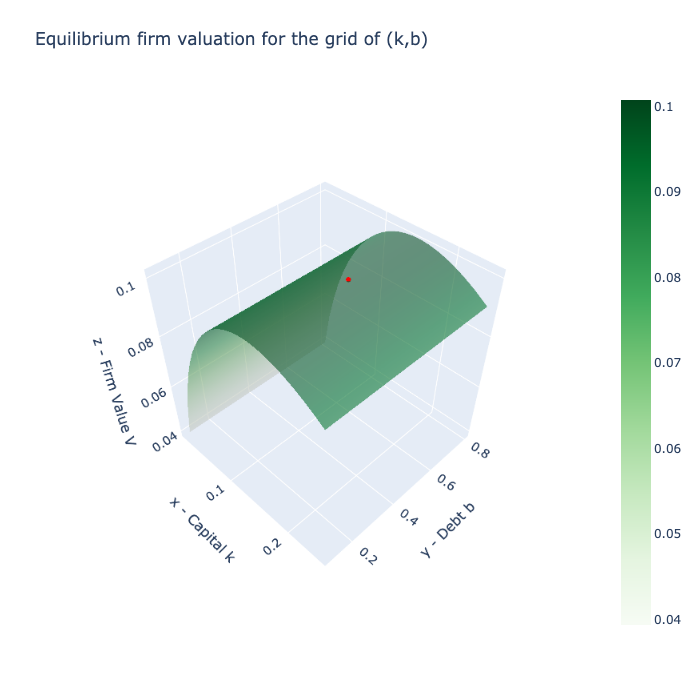

In [7]:
from IPython.display import Image
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import plotly.graph_objs as go

# Firm Valuation
fig = go.Figure(data=[go.Scatter3d(x=[kss],
                                   y=[bss],
                                   z=[Vss],
                                   mode='markers',
                                   marker=dict(size=3, color='red')),
                      go.Surface(x=kgrid,
                                 y=bgrid,
                                 z=Vgrid,
                                 colorscale='Greens',opacity=0.6)])

fig.update_layout(scene = dict(
                    xaxis_title='x - Capital k',
                    yaxis_title='y - Debt b',
                    zaxis_title='z - Firm Value V',
                    aspectratio = dict(x=1,y=1,z=1)),
                  width=700,
                  height=700,
                  margin=dict(l=50, r=50, b=65, t=90))
fig.update_layout(scene_camera=dict(eye=dict(x=1.5, y=-1.5, z=2)))
fig.update_layout(title='Equilibrium firm valuation for the grid of (k,b)')

# Export to PNG file
Image(fig.to_image(format="png"))
# fig.show() will provide interactive plot when running
# code locally

#### A Modigliani-Miller theorem?

The red dot in the above graph is **both** an equilibrium $(b,k)$
chosen by a representative firm **and** the equilibrium $B, K$
pair chosen by the aggregate of all firms.

Thus, **in equilibrium** it
is true that

$$
(b,k) = (B,K)
$$

But an individual firm named $\zeta \in [0,1]$ neither knows nor
cares whether it sets $(b(\zeta),k(\zeta)) = (B,K)$.

Indeed the above graph has a ridge of $b(\zeta)$’s that also
maximize the firm’s value so long as it sets $k(\zeta) = K$.

Here it is important that the measure of firms that deviate from setting
$b$ at the red dot is very small – measure zero – so that
$B$ remains at the red dot even while one firm $\zeta$
deviates.

So within this equilibrium, there is a  *qualified* Modigliani-Miller theorem
that asserts that firm $\zeta$’s value is
independent of how it mixes its financing between equity and bonds (so
long as it is not  what other firms do on average).

Thus, while an individual firm $\zeta$’s financial structure is
indeterminate, the **market’s** financial structure is determinant and
sits at the red dot in the above graph.

This contrasts sharply with the *unqualified* Modigliani-Miller theorem
descibed in the complete markets model in the lecture {doc}`BCG_complete_mkts <BCG_complete_mkts>`.

There the **market’s** financial structure was indeterminate.

These subtle distinctions  bear more thought and exploration.

So we will do some calculations  to ferret out a sense in which
the equilibrium $(k,b) = (K,B)$ outcome at the red dot in the
above graph is **stable**.

In particular, we’ll explore the consequences of some choices of
$b=B$ that deviate from the red dot and ask whether firm
$\zeta$ would want to remain at that $b$.

In more detail, here is what we’ll do:

1. Obtain equilibrium values of capital and debt as $k^*=K$ and
   $b^*=B$,  the red dot above.
1. Now fix $k^*$ and let $b^{**} = b^* - e$ for some
   $e > 0$. Conjecture that big $K = k^*$ but big
   $B = b^{**}$.
1. Take $K$ and $B$ and compute intertermporal marginal rates of substitution (IMRS's) as we did before.
1. Taking the **new** IMRS to the firm’s problem. Plot 3D surface for
   the valuations of the firm with this **new** IMRS.
1. Check if the value at $k^*$, $b^{**}$ is at the top of
   this new 3D surface.
1. Repeat these calculations for $b^{**} = b^* + e$.

To conduct the above procedures, we create a function `off_eq_check`
that inputs the BCG model instance parameters, equilibrium capital
$K=k^*$ and debt $B=b^*$, and a perturbation of debt $e$.

The function outputs the fixed point firm values $V^{**}$, prices
$q^{**}$, $p^{**}$, and consumption choices $c^{**}$.

Importantly, we relax the condition that only agent 2 holds bonds.

Now **both** agents can hold bonds, i.e., $0\leq \xi^1 \leq B$ and
$\xi^1 +\xi^2 = B$.

That implies the consumers’ budget constraints are:

$$
\begin{aligned}
c^1_0 &= w^1_0 + \theta^1_0V - q\theta^1 - p\xi^1 \\
c^2_0 &= w^2_0 + \theta^2_0V - q\theta^2 - p\xi^2 \\
c^1_1(\epsilon) &= w^1_1(\epsilon) + \theta^1 d^e(k,b;\epsilon) + \xi^1 \\
c^2_1(\epsilon) &= w^2_1(\epsilon) + \theta^2 d^e(k,b;\epsilon) + \xi^2
\end{aligned}
$$

The function also outputs agent 1’s bond holdings $\xi_1$.

In [8]:
def off_eq_check(mdl,kss,bss,e=0.1):
    # Big K and big B
    k = kss
    b = bss + e

    # Load parameters
    𝜓1 = mdl.𝜓1
    𝜓2 = mdl.𝜓2
    𝛼 = mdl.𝛼
    A = mdl.A
    𝛽 = mdl.𝛽
    bound = mdl.bound
    Vl = mdl.Vl
    Vh = mdl.Vh
    kbot = mdl.kbot
    ktop = mdl.ktop
    bbot = mdl.bbot
    btop = mdl.btop
    w10 = mdl.w10
    w20 = mdl.w20
    𝜃10 = mdl.𝜃10
    𝜃20 = mdl.𝜃20
    w11 = mdl.w11
    w21 = mdl.w21
    g = mdl.g

    Y = njit(lambda 𝜖, fk: np.exp(𝜖)*fk)
    intqq1 = njit(lambda 𝜖, fk, 𝜃1, 𝜓1, 𝜉1, b: (w11(𝜖) + 𝜃1*(Y(𝜖, fk) - b) + 𝜉1)**(-𝜓1)*(Y(𝜖, fk) - b)*g(𝜖))
    intpp1a = njit(lambda 𝜖, fk, 𝜓1, 𝜉1, b: (Y(𝜖, fk)/b)*(w11(𝜖) + Y(𝜖, fk)/b*𝜉1)**(-𝜓1)*g(𝜖))
    intpp1b = njit(lambda 𝜖, fk, 𝜃1, 𝜓1, 𝜉1, b: (w11(𝜖) + 𝜃1*(Y(𝜖, fk)-b) + 𝜉1)**(-𝜓1)*g(𝜖))
    intpp2a = njit(lambda 𝜖, fk, 𝜓2, 𝜉2, b: (Y(𝜖, fk)/b)*(w21(𝜖) + Y(𝜖, fk)/b*𝜉2)**(-𝜓2)*g(𝜖))
    intpp2b = njit(lambda 𝜖, fk, 𝜃2, 𝜓2, 𝜉2, b: (w21(𝜖) + 𝜃2*(Y(𝜖, fk)-b) + 𝜉2)**(-𝜓2)*g(𝜖))
    intqq2 = njit(lambda 𝜖, fk, 𝜃2, 𝜓2, b: (w21(𝜖) + 𝜃2*(Y(𝜖, fk)-b) + b)**(-𝜓2)*(Y(𝜖, fk) - b)*g(𝜖))


    # Loop: Find fixed points V, q and p
    V_crit = 1
    while V_crit>1e-5:

        # We begin by adding the guess for the value of the firm to endowment
        V = (Vl+Vh)/2
        ww10 = w10 + 𝜃10*V
        ww20 = w20 + 𝜃20*V

        # Production
        fk = A*(k**𝛼)
#         Y = lambda 𝜖: np.exp(𝜖)*fk

        # Compute integration threshold
        epstar = np.log(b/fk)


        #**************************************************************
        # Compute the prices and allocations consistent with consumers'
        # Euler equations
        #**************************************************************

        # We impose the following:
        # Agent 1 buys equity
        # Agent 2 buys equity and all debt
        # Agents trade such that prices converge

        #========
        # Agent 1
        #========
        # Holdings
        𝜉1a = 0
        𝜉1b = b/2
        p = 0.3

        while abs(𝜉1b - 𝜉1a) > 0.001:

            𝜉1 = (𝜉1a + 𝜉1b) / 2
            𝜃1a = 0.3
            𝜃1b = 1

            while abs(𝜃1b - 𝜃1a) > (0.001/b):

                𝜃1 = (𝜃1a + 𝜃1b) / 2

                # qq1 is the equity price consistent with agent-1 Euler Equation
                ## Note: Price is in the date-0 budget constraint of the agent

                ## First, compute the constant term that is not influenced by q
                ## that is, 𝛽E[u'(c^{1}_{1})d^{e}(k,B)]
#                 intqq1 = lambda 𝜖: (w11(𝜖) + 𝜃1*(Y(𝜖, fk) - b) + 𝜉1)**(-𝜓1)*(Y(𝜖, fk) - b)*g(𝜖)
#                 const_qq1 = 𝛽 * quad(intqq1,epstar,bound)[0]
                const_qq1 = 𝛽 * quad(intqq1,epstar,bound, args=(fk, 𝜃1, 𝜓1, 𝜉1, b))[0]

                ## Second, iterate to get the equity price q
                qq1l = 0
                qq1h = ww10
                diff = 1
                while diff > 1e-7:
                    qq1 = (qq1l+qq1h)/2
                    rhs = const_qq1/((ww10-qq1*𝜃1-p*𝜉1)**(-𝜓1));
                    if (rhs > qq1):
                        qq1l = qq1
                    else:
                        qq1h = qq1
                    diff = abs(qq1l-qq1h)

                # pp1 is the bond price consistent with agent-2 Euler Equation
                ## Note: Price is in the date-0 budget constraint of the agent

                ## First, compute the constant term that is not influenced by p
                ## that is, 𝛽E[u'(c^{1}_{1})d^{b}(k,B)]
#                 intpp1a = lambda 𝜖: (Y(𝜖, fk)/b)*(w11(𝜖) + Y(𝜖, fk)/b*𝜉1)**(-𝜓1)*g(𝜖)
#                 intpp1b = lambda 𝜖: (w11(𝜖) + 𝜃1*(Y(𝜖, fk)-b) + 𝜉1)**(-𝜓1)*g(𝜖)
#                 const_pp1 = 𝛽 * (quad(intpp1a,-bound,epstar)[0] + quad(intpp1b,epstar,bound)[0])
                const_pp1 = 𝛽 * (quad(intpp1a,-bound,epstar, args=(fk, 𝜓1, 𝜉1, b))[0] \
                                  + quad(intpp1b,epstar,bound, args=(fk, 𝜃1, 𝜓1, 𝜉1, b))[0])

                ## iterate to get the bond price p
                pp1l = 0
                pp1h = ww10/b
                diff = 1
                while diff > 1e-7:
                    pp1 = (pp1l+pp1h)/2
                    rhs = const_pp1/((ww10-qq1*𝜃1-pp1*𝜉1)**(-𝜓1))
                    if (rhs > pp1):
                        pp1l = pp1
                    else:
                        pp1h = pp1
                    diff = abs(pp1l-pp1h)

                #========
                # Agent 2
                #========
                𝜉2 = b - 𝜉1
                𝜃2 = 1 - 𝜃1

                # pp2 is the bond price consistent with agent-2 Euler Equation
                ## Note: Price is in the date-0 budget constraint of the agent

                ## First, compute the constant term that is not influenced by p
                ## that is, 𝛽E[u'(c^{2}_{1})d^{b}(k,B)]
#                 intpp2a = lambda 𝜖: (Y(𝜖, fk)/b)*(w21(𝜖) + Y(𝜖, fk)/b*𝜉2)**(-𝜓2)*g(𝜖)
#                 intpp2b = lambda 𝜖: (w21(𝜖) + 𝜃2*(Y(𝜖, fk)-b) + 𝜉2)**(-𝜓2)*g(𝜖)
#                 const_pp2 = 𝛽 * (quad(intpp2a,-bound,epstar)[0] + quad(intpp2b,epstar,bound)[0])
                const_pp2 = 𝛽 * (quad(intpp2a,-bound,epstar, args=(fk, 𝜓2, 𝜉2, b))[0] \
                                  + quad(intpp2b,epstar,bound, args=(fk, 𝜃2, 𝜓2, 𝜉2, b))[0])

                ## iterate to get the bond price p
                pp2l = 0
                pp2h = ww20/b
                diff = 1
                while diff > 1e-7:
                    pp2 = (pp2l+pp2h)/2
                    rhs = const_pp2/((ww20-qq1*𝜃2-pp2*𝜉2)**(-𝜓2))
                    if (rhs > pp2):
                        pp2l = pp2
                    else:
                        pp2h = pp2
                    diff = abs(pp2l-pp2h)

                # p be the maximum valuation for the bond among agents
                ## This will be the equity price based on Makowski's criterion
                p = max(pp1,pp2)


                # qq2 is the equity price consistent with agent-2 Euler Equation
#                 intqq2 = lambda 𝜖: (w21(𝜖) + 𝜃2*(Y(𝜖, fk)-b) + b)**(-𝜓2)*(Y(𝜖, fk) - b)*g(𝜖)
#                 const_qq2 = 𝛽 * quad(intqq2,epstar,bound)[0]
                const_qq2 = 𝛽 * quad(intqq2,epstar,bound, args=(fk, 𝜃2, 𝜓2, b))[0]
                qq2l = 0
                qq2h = ww20
                diff = 1
                while diff > 1e-7:
                    qq2 = (qq2l+qq2h)/2
                    rhs = const_qq2/((ww20-qq2*𝜃2-p*𝜉2)**(-𝜓2));
                    if (rhs > qq2):
                        qq2l = qq2
                    else:
                        qq2h = qq2
                    diff = abs(qq2l-qq2h)

                # q be the maximum valuation for the equity among agents
                ## This will be the equity price based on Makowski's criterion
                q = max(qq1,qq2)

                #================
                # Update holdings
                #================
                if qq1 > qq2:
                    𝜃1a = 𝜃1
                else:
                    𝜃1b = 𝜃1

                #print(p,q,𝜉1,𝜃1)

            if pp1 > pp2:
                𝜉1a = 𝜉1
            else:
                𝜉1b = 𝜉1


        #================
        # Get consumption
        #================
        c10 = ww10 - q*𝜃1 - p*𝜉1
        c11 = lambda 𝜖: w11(𝜖) + 𝜃1*max(Y(𝜖, fk)-b,0) + 𝜉1*min(Y(𝜖, fk)/b,1)
        c20 = ww20 - q*(1-𝜃1) - p*(b-𝜉1)
        c21 = lambda 𝜖: w21(𝜖) + (1-𝜃1)*max(Y(𝜖, fk)-b,0) + (b-𝜉1)*min(Y(𝜖, fk)/b,1)

        # Compute the value of the firm
        value_x = -k + q + p*b
        if (value_x > V):
            Vl = V
        else:
            Vh = V
        V_crit = abs(value_x-V)

    return V,k,b,p,q,c10,c11,c20,c21,𝜉1

Here is our strategy for checking *stability* of an equilibrium.

We use `off_eq_check` to obtain  consumption plans for both agents
at the conjectured big $K$ and big $B$.

Then we input  consumption plans into the function `eq_valuation`
from the BCG model class and plot the agents’ valuations associated
with different choices of $k$ and $b$.

Our hunch is that $(k^*,b^{**})$ is **not** at the top of the
firm valuation 3D surface so that the firm is **not** maximizing its
value if it chooses $k = K = k^*$ and $b = B = b^{**}$.

That indicates that $(k^*,b^{**})$ is not an equilibrium capital
structure for the firm.

We first check the case in which $b^{**} = b^* - e$ where
$e = 0.1$:

Maximum valuation of the firm value in the (k,b) grid: 0.1191
Equilibrium firm value: 0.1118


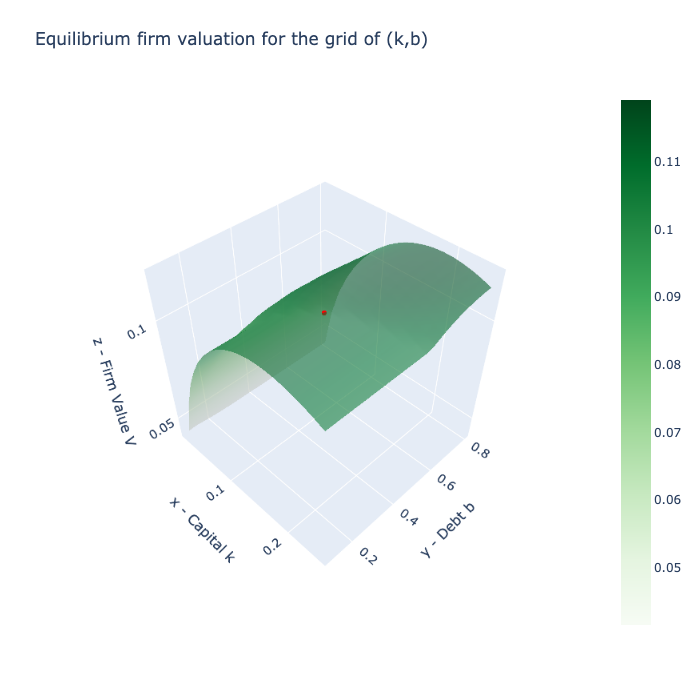

In [9]:
#====================== Experiment 1 ======================#
Ve1,ke1,be1,pe1,qe1,c10e1,c11e1,c20e1,c21e1,𝜉1e1 = off_eq_check(mdl,
                                                                kss,
                                                                bss,
                                                                e=-0.1)

# Firm Valuation
kgride1, bgride1, Vgride1, Qgride1, Pgride1 = mdl.eq_valuation(c10e1, c11e1, c20e1, c21e1,N=20)

print('Maximum valuation of the firm value in the (k,b) grid: {:.4f}'.format(Vgride1.max()))
print('Equilibrium firm value: {:.4f}'.format(Ve1))

fig = go.Figure(data=[go.Scatter3d(x=[ke1],
                                   y=[be1],
                                   z=[Ve1],
                                   mode='markers',
                                   marker=dict(size=3, color='red')),
                      go.Surface(x=kgride1,
                                 y=bgride1,
                                 z=Vgride1,
                                 colorscale='Greens',opacity=0.6)])

fig.update_layout(scene = dict(
                    xaxis_title='x - Capital k',
                    yaxis_title='y - Debt b',
                    zaxis_title='z - Firm Value V',
                    aspectratio = dict(x=1,y=1,z=1)),
                  width=700,
                  height=700,
                  margin=dict(l=50, r=50, b=65, t=90))
fig.update_layout(scene_camera=dict(eye=dict(x=1.5, y=-1.5, z=2)))
fig.update_layout(title='Equilibrium firm valuation for the grid of (k,b)')


# Export to PNG file
Image(fig.to_image(format="png"))
# fig.show() will provide interactive plot when running
# code locally

In the above 3D surface of prospective firm valuations, the perturbed
choice $(k^*,b^{*}-e)$, represented by the red dot, is not at the
top.

The firm could issue more debts and attain a higher firm valuation from
the market.

Therefore, $(k^*,b^{*}-e)$ would not be an equilibrium.

Next, we check for $b^{**} = b^* + e$.

Maximum valuation of the firm value in the (k,b) grid: 0.1082
Equilibrium firm value: 0.0974


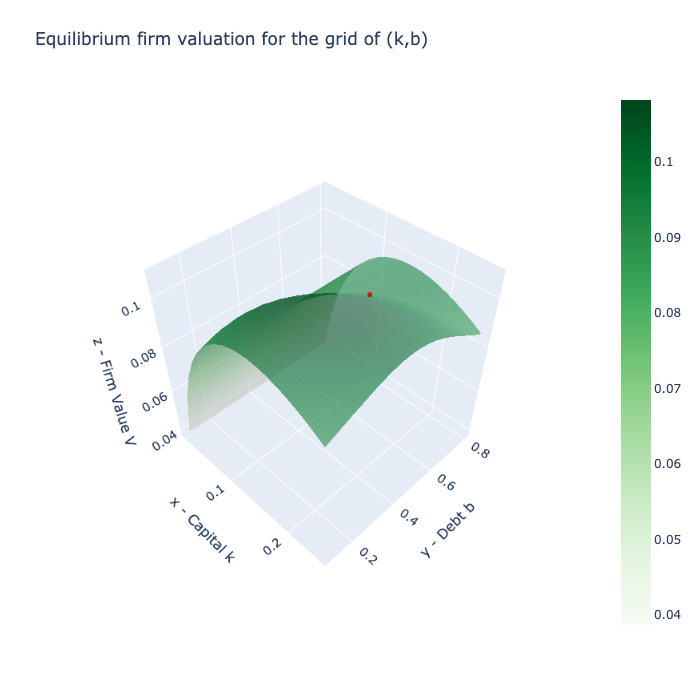

In [10]:
#====================== Experiment 2 ======================#
Ve2,ke2,be2,pe2,qe2,c10e2,c11e2,c20e2,c21e2,𝜉1e2 = off_eq_check(mdl,
                                                                kss,
                                                                bss,
                                                                e=0.1)

# Firm Valuation
kgride2, bgride2, Vgride2, Qgride2, Pgride2 = mdl.eq_valuation(c10e2, c11e2, c20e2, c21e2,N=20)

print('Maximum valuation of the firm value in the (k,b) grid: {:.4f}'.format(Vgride2.max()))
print('Equilibrium firm value: {:.4f}'.format(Ve2))

fig = go.Figure(data=[go.Scatter3d(x=[ke2],
                                   y=[be2],
                                   z=[Ve2],
                                   mode='markers',
                                   marker=dict(size=3, color='red')),
                      go.Surface(x=kgride2,
                                 y=bgride2,
                                 z=Vgride2,
                                 colorscale='Greens',opacity=0.6)])

fig.update_layout(scene = dict(
                    xaxis_title='x - Capital k',
                    yaxis_title='y - Debt b',
                    zaxis_title='z - Firm Value V',
                    aspectratio = dict(x=1,y=1,z=1)),
                  width=700,
                  height=700,
                  margin=dict(l=50, r=50, b=65, t=90))
fig.update_layout(scene_camera=dict(eye=dict(x=1.5, y=-1.5, z=2)))
fig.update_layout(title='Equilibrium firm valuation for the grid of (k,b)')

# Export to PNG file
Image(fig.to_image(format="png"))
# fig.show() will provide interactive plot when running
# code locally

In contrast to $(k^*,b^* - e)$, the 3D surface for
$(k^*,b^*+e)$ now indicates that a firm would want o *decrease*
its debt issuance to attain a higher valuation.

That incentive to deviate means that $(k^*,b^*+e)$ is not an
equilibrium capital structure for the firm.

Interestingly, if consumers were to anticipate that firms would
over-issue debt, i.e. $B > b^*$, then both types of consumer would
want to hold corporate debt.

For example,  $\xi^1 > 0$:

In [11]:
print('Bond holdings of agent 1: {:.3f}'.format(𝜉1e2))

Bond holdings of agent 1: 0.039


Our two *stability experiments* suggest that the equilibrium capital
structure $(k^*,b^*)$ is locally unique even though **at the
equilibrium** an individual firm would be willing to deviate from the
representative firms’ equilibrium  debt choice.

These experiments thus refine our discussion of the *qualified*
Modigliani-Miller theorem that prevails in this example economy.

#### Equilibrium equity and bond price functions

It is also interesting to look at the equilibrium price functions
$q(k,b)$ and $p(k,b)$ faced by firms in our rational
expectations equilibrium.

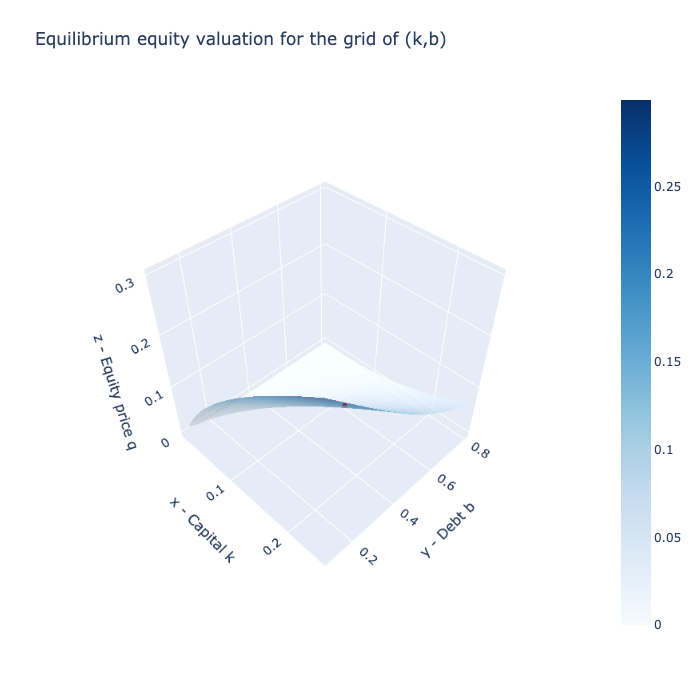

In [12]:
# Equity Valuation
fig = go.Figure(data=[go.Scatter3d(x=[kss],
                                   y=[bss],
                                   z=[qss],
                                   mode='markers',
                                   marker=dict(size=3, color='red')),
                      go.Surface(x=kgrid,
                                 y=bgrid,
                                 z=Qgrid,
                                 colorscale='Blues',opacity=0.6)])

fig.update_layout(scene = dict(
                    xaxis_title='x - Capital k',
                    yaxis_title='y - Debt b',
                    zaxis_title='z - Equity price q',
                    aspectratio = dict(x=1,y=1,z=1)),
                  width=700,
                  height=700,
                  margin=dict(l=50, r=50, b=65, t=90))
fig.update_layout(scene_camera=dict(eye=dict(x=1.5, y=-1.5, z=2)))
fig.update_layout(title='Equilibrium equity valuation for the grid of (k,b)')


# Export to PNG file
Image(fig.to_image(format="png"))
# fig.show() will provide interactive plot when running
# code locally

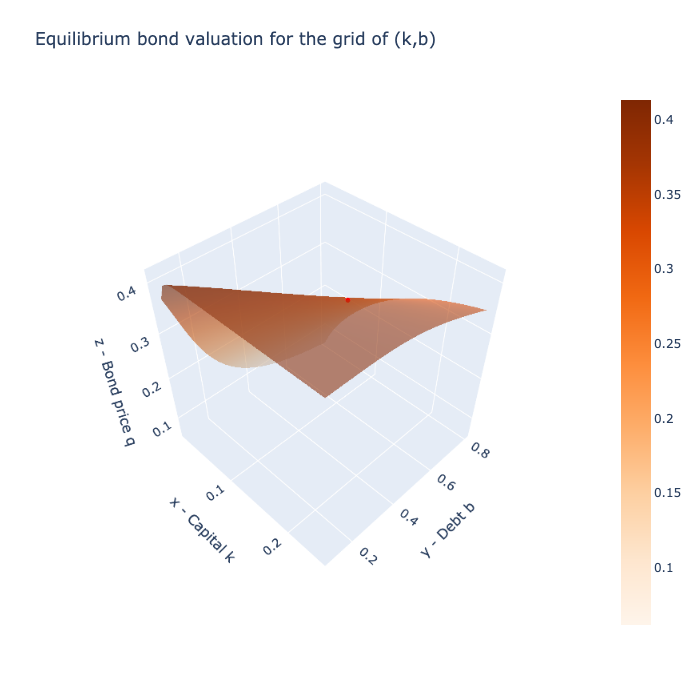

In [13]:
# Bond Valuation
fig = go.Figure(data=[go.Scatter3d(x=[kss],
                                   y=[bss],
                                   z=[pss],
                                   mode='markers',
                                   marker=dict(size=3, color='red')),
                      go.Surface(x=kgrid,
                                 y=bgrid,
                                 z=Pgrid,
                                 colorscale='Oranges',opacity=0.6)])

fig.update_layout(scene = dict(
                    xaxis_title='x - Capital k',
                    yaxis_title='y - Debt b',
                    zaxis_title='z - Bond price q',
                    aspectratio = dict(x=1,y=1,z=1)),
                  width=700,
                  height=700,
                  margin=dict(l=50, r=50, b=65, t=90))
fig.update_layout(scene_camera=dict(eye=dict(x=1.5, y=-1.5, z=2)))
fig.update_layout(title='Equilibrium bond valuation for the grid of (k,b)')


# Export to PNG file
Image(fig.to_image(format="png"))
# fig.show() will provide interactive plot when running
# code locally

### Comments on equilibrium pricing functions

The equilibrium pricing functions displayed above merit study and
reflection.

They reveal the countervailing effects on a firm’s valuations of bonds
and equities that lie beneath the Modigliani-Miller ridge apparent in
our earlier graph of an individual firm $\zeta$’s value as a
function of $k(\zeta), b(\zeta)$.

### Another example economy

We illustrate how the fraction of initial endowments held by agent 2,
$w^2_0/(w^1_0+w^2_0)$ affects an equilibrium capital structure
$(k,b) = (K, B)$ well as associated equilibrium allocations.

We are interested in how  agents 1 and 2
value equity and  bond.

$$
\begin{aligned}
Q^i = \beta \int \frac{u^\prime(C^{i,*}_1(\epsilon))}{u^\prime(C^{i,*}_0)} d^e(k^*,b^*;\epsilon) g(\epsilon) \ d\epsilon \\
P^i = \beta \int \frac{u^\prime(C^{i,*}_1(\epsilon))}{u^\prime(C^{i,*}_0)} d^b(k^*,b^*;\epsilon) g(\epsilon) \ d\epsilon \\
\end{aligned}
$$

The function `valuations_by_agent` is used in calculating these
valuations.

In [14]:
# Lists for storage
wlist = []
klist = []
blist = []
qlist = []
plist = []
Vlist = []
tlist = []
q1list = []
q2list = []
p1list = []
p2list = []

# For loop: optimization for each endowment combination
for i in range(10):
    print(i)

    # Save fraction
    w10 = 0.9 - 0.05*i
    w20 = 1.1 + 0.05*i
    wlist.append(w20/(w10+w20))

    # Create the instance
    mdl = BCG_incomplete_markets(w10 = w10, w20 = w20, ktop = 0.5, btop = 2.5)

    # Solve for equilibrium
    kss,bss,Vss,qss,pss,c10ss,c11ss,c20ss,c21ss,𝜃1ss = mdl.solve_eq(print_crit=False)

    # Store the equilibrium results
    klist.append(kss)
    blist.append(bss)
    qlist.append(qss)
    plist.append(pss)
    Vlist.append(Vss)
    tlist.append(𝜃1ss)

    # Evaluations of equity and bond by each agent
    Q1,Q2,P1,P2 = mdl.valuations_by_agent(c10ss, c11ss, c20ss, c21ss, kss, bss)

    # Save the valuations
    q1list.append(Q1)
    q2list.append(Q2)
    p1list.append(P1)
    p2list.append(P2)

0


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.178', '0.502', '0.407', '0.092', '-0.000', '-0.000', '-0.570', '0.250', '0.131']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.155', '0.487', '0.381', '0.073', '-0.001', '0.000', '-0.518', '0.125', '0.022']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.145', '0.480', '0.367', '0.065', '0.000', '-0.000', '-0.490', '0.062', '0.034']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.150', '0.484', '0.374', '0.069', '0.000', '0.000', '-0.504', '0.094', '0.006']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.153', '0.485', '0.378', '0.071', '0.000', '-0.000', '-0.511', '0.109', '0.008']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.151', '0.484', '0.376', '0.070', '-0.000', '-0.000', '-0.508', '0.102', '0.001']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.151', '0.483', '0.375', '0.070', '0.000', '-0.000', '-0.507', '0.098', '0.003']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.151', '0.484', '0.375', '0.070', '-0.000', '0.000', '-0.506', '0.100', '0.001']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.151', '0.484', '0.376', '0.070', '0.000', '0.000', '-0.507', '0.101', '0.000']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.151', '0.484', '0.376', '0.070', '-0.000', '0.000', '-0.507', '0.101', '0.000']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.151', '0.484', '0.376', '0.070', '0.000', '0.000', '-0.507', '0.101', '0.000']
finished
1


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.180', '0.544', '0.404', '0.081', '-0.000', '-0.000', '-0.498', '0.250', '0.130']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.158', '0.531', '0.378', '0.063', '-0.000', '-0.000', '-0.443', '0.125', '0.020']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.148', '0.525', '0.364', '0.055', '0.000', '-0.000', '-0.414', '0.062', '0.036']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.153', '0.528', '0.371', '0.059', '0.000', '0.000', '-0.428', '0.094', '0.008']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.156', '0.530', '0.374', '0.061', '-0.000', '-0.000', '-0.435', '0.109', '0.006']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.154', '0.529', '0.373', '0.060', '0.000', '-0.000', '-0.432', '0.102', '0.001']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.155', '0.529', '0.373', '0.061', '0.000', '0.000', '-0.433', '0.105', '0.002']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.155', '0.529', '0.373', '0.060', '-0.000', '0.000', '-0.433', '0.104', '0.000']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.154', '0.529', '0.373', '0.060', '-0.000', '0.000', '-0.433', '0.103', '0.000']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.154', '0.529', '0.373', '0.060', '0.000', '-0.000', '-0.432', '0.103', '0.000']
finished
2


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.184', '0.590', '0.400', '0.070', '0.000', '0.000', '-0.427', '0.250', '0.128']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.162', '0.581', '0.373', '0.053', '0.000', '-0.000', '-0.366', '0.125', '0.017']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.152', '0.577', '0.359', '0.046', '-0.000', '-0.000', '-0.335', '0.062', '0.039']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.157', '0.579', '0.366', '0.049', '0.000', '0.000', '-0.351', '0.094', '0.011']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.159', '0.580', '0.369', '0.051', '-0.000', '-0.000', '-0.359', '0.109', '0.003']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.158', '0.579', '0.368', '0.050', '-0.000', '-0.000', '-0.355', '0.102', '0.004']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.159', '0.579', '0.369', '0.051', '-0.000', '-0.000', '-0.357', '0.105', '0.000']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.159', '0.580', '0.369', '0.051', '0.000', '0.000', '-0.358', '0.107', '0.001']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.159', '0.580', '0.369', '0.051', '-0.000', '-0.000', '-0.358', '0.106', '0.001']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.159', '0.580', '0.368', '0.051', '-0.000', '-0.000', '-0.357', '0.106', '0.000']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.159', '0.580', '0.368', '0.051', '0.000', '-0.000', '-0.357', '0.106', '0.000']
finished
3


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.187', '0.642', '0.395', '0.059', '0.000', '0.000', '-0.354', '0.250', '0.125']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.166', '0.638', '0.366', '0.044', '-0.000', '-0.000', '-0.289', '0.125', '0.014']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.156', '0.637', '0.351', '0.037', '0.000', '-0.000', '-0.255', '0.062', '0.042']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.161', '0.637', '0.359', '0.040', '-0.000', '-0.000', '-0.273', '0.094', '0.014']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.164', '0.637', '0.363', '0.042', '-0.000', '-0.000', '-0.282', '0.109', '0.000']
finished
4


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.192', '0.702', '0.387', '0.049', '0.000', '-0.000', '-0.281', '0.250', '0.122']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.172', '0.704', '0.357', '0.035', '-0.000', '0.000', '-0.211', '0.125', '0.010']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.162', '0.706', '0.342', '0.029', '-0.000', '-0.000', '-0.173', '0.062', '0.046']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.167', '0.705', '0.350', '0.032', '-0.000', '-0.000', '-0.192', '0.094', '0.018']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.170', '0.705', '0.354', '0.033', '-0.000', '-0.000', '-0.202', '0.109', '0.004']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.171', '0.704', '0.356', '0.034', '0.000', '0.000', '-0.206', '0.117', '0.003']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.170', '0.704', '0.355', '0.034', '-0.000', '-0.000', '-0.204', '0.113', '0.000']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.170', '0.704', '0.355', '0.034', '-0.000', '0.000', '-0.205', '0.115', '0.002']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.170', '0.704', '0.355', '0.034', '-0.000', '0.000', '-0.205', '0.114', '0.001']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.170', '0.704', '0.355', '0.034', '-0.000', '-0.000', '-0.205', '0.114', '0.000']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.170', '0.704', '0.355', '0.034', '0.000', '0.000', '-0.204', '0.114', '0.000']
finished
5


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.198', '0.771', '0.377', '0.039', '-0.000', '-0.000', '-0.205', '0.250', '0.118']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.178', '0.781', '0.346', '0.027', '-0.000', '0.000', '-0.129', '0.125', '0.006']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.169', '0.788', '0.330', '0.022', '0.000', '-0.000', '-0.088', '0.062', '0.050']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.174', '0.784', '0.338', '0.024', '-0.000', '0.000', '-0.109', '0.094', '0.022']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.176', '0.783', '0.342', '0.026', '-0.000', '-0.000', '-0.119', '0.109', '0.008']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.177', '0.781', '0.344', '0.026', '0.000', '-0.000', '-0.125', '0.117', '0.001']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.178', '0.781', '0.345', '0.027', '0.000', '0.000', '-0.127', '0.121', '0.003']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.178', '0.782', '0.345', '0.026', '-0.000', '0.000', '-0.125', '0.119', '0.001']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.177', '0.782', '0.345', '0.026', '-0.000', '-0.000', '-0.125', '0.118', '0.000']
finished
6


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.205', '0.851', '0.366', '0.030', '-0.000', '-0.000', '-0.126', '0.250', '0.114']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.186', '0.872', '0.333', '0.020', '0.000', '0.000', '-0.043', '0.125', '0.001']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.177', '0.885', '0.316', '0.016', '0.000', '0.000', '0.001', '0.062', '0.055']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.181', '0.878', '0.324', '0.018', '-0.000', '0.000', '-0.022', '0.094', '0.027']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.184', '0.875', '0.328', '0.019', '0.000', '-0.000', '-0.033', '0.109', '0.013']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.185', '0.874', '0.330', '0.019', '0.000', '0.000', '-0.038', '0.117', '0.006']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.185', '0.873', '0.332', '0.019', '0.000', '0.000', '-0.041', '0.121', '0.002']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.186', '0.872', '0.332', '0.020', '-0.000', '-0.000', '-0.042', '0.123', '0.001']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.186', '0.872', '0.332', '0.020', '-0.000', '-0.000', '-0.044', '0.124', '0.000']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.186', '0.872', '0.332', '0.020', '-0.000', '0.000', '-0.043', '0.124', '0.000']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.186', '0.872', '0.332', '0.020', '0.000', '0.000', '-0.043', '0.124', '0.000']
finished
7


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.212', '0.945', '0.351', '0.022', '0.000', '0.000', '-0.043', '0.250', '0.108']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.194', '0.980', '0.316', '0.014', '0.000', '0.000', '0.047', '0.125', '0.005']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.203', '0.961', '0.334', '0.018', '0.000', '0.000', '-0.000', '0.188', '0.052']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.199', '0.970', '0.325', '0.016', '-0.000', '0.000', '0.023', '0.156', '0.024']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.196', '0.975', '0.321', '0.015', '0.000', '0.000', '0.034', '0.141', '0.010']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.195', '0.977', '0.319', '0.014', '0.000', '0.000', '0.041', '0.133', '0.003']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.195', '0.979', '0.318', '0.014', '-0.000', '0.000', '0.044', '0.129', '0.001']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.195', '0.978', '0.318', '0.014', '-0.000', '0.000', '0.042', '0.131', '0.001']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.195', '0.979', '0.318', '0.014', '-0.000', '0.000', '0.043', '0.130', '0.000']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.195', '0.978', '0.318', '0.014', '0.000', '-0.000', '0.042', '0.130', '0.000']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.195', '0.978', '0.318', '0.014', '0.000', '-0.000', '0.043', '0.130', '0.000']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.195', '0.978', '0.318', '0.014', '-0.000', '0.000', '0.043', '0.130', '0.000']
finished
8


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.221', '1.056', '0.334', '0.016', '0.000', '0.000', '0.044', '0.250', '0.103']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.204', '1.110', '0.298', '0.009', '0.000', '0.000', '0.143', '0.125', '0.011']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.212', '1.081', '0.316', '0.012', '0.000', '0.000', '0.092', '0.188', '0.046']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.208', '1.095', '0.307', '0.010', '0.000', '0.000', '0.117', '0.156', '0.018']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.206', '1.102', '0.302', '0.010', '-0.000', '0.000', '0.130', '0.141', '0.003']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.205', '1.107', '0.300', '0.009', '-0.000', '-0.000', '0.137', '0.133', '0.004']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.205', '1.105', '0.301', '0.009', '-0.000', '0.000', '0.133', '0.137', '0.000']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.206', '1.104', '0.302', '0.010', '0.000', '0.000', '0.131', '0.139', '0.002']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.205', '1.104', '0.301', '0.009', '0.000', '-0.000', '0.132', '0.138', '0.001']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.205', '1.104', '0.301', '0.009', '0.000', '-0.000', '0.133', '0.137', '0.000']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.205', '1.104', '0.301', '0.009', '-0.000', '0.000', '0.133', '0.137', '0.000']
finished
9


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.231', '1.189', '0.315', '0.010', '0.000', '-0.000', '0.137', '0.250', '0.096']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.214', '1.269', '0.277', '0.005', '0.000', '-0.000', '0.247', '0.125', '0.018']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.222', '1.226', '0.296', '0.008', '-0.000', '0.000', '0.190', '0.188', '0.039']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.218', '1.247', '0.286', '0.006', '0.000', '-0.000', '0.218', '0.156', '0.011']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.216', '1.258', '0.282', '0.006', '-0.000', '-0.000', '0.233', '0.141', '0.003']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.217', '1.252', '0.284', '0.006', '-0.000', '-0.000', '0.225', '0.148', '0.004']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.216', '1.256', '0.283', '0.006', '-0.000', '0.000', '0.229', '0.145', '0.000']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.216', '1.256', '0.282', '0.006', '-0.000', '0.000', '0.231', '0.143', '0.002']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.216', '1.256', '0.282', '0.006', '0.000', '0.000', '0.230', '0.144', '0.001']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.216', '1.255', '0.283', '0.006', '0.000', '-0.000', '0.229', '0.144', '0.000']


k,b,p,q,kfoc,bfoc,epstar,V,V_crit
['0.216', '1.255', '0.283', '0.006', '-0.000', '0.000', '0.229', '0.144', '0.000']
finished


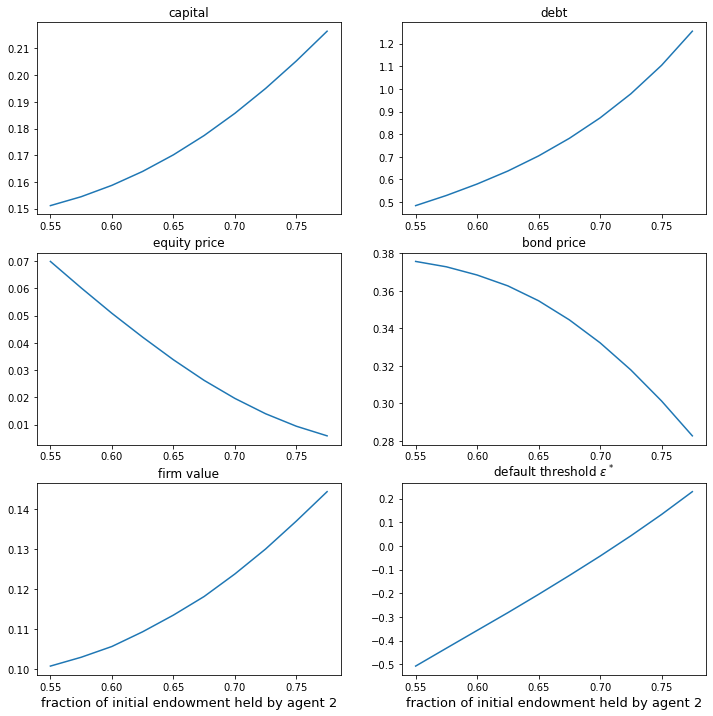

In [15]:
# Plot
fig, ax = plt.subplots(3,2,figsize=(12,12))
ax[0,0].plot(wlist,klist)
ax[0,0].set_title('capital')
ax[0,1].plot(wlist,blist)
ax[0,1].set_title('debt')
ax[1,0].plot(wlist,qlist)
ax[1,0].set_title('equity price')
ax[1,1].plot(wlist,plist)
ax[1,1].set_title('bond price')
ax[2,0].plot(wlist,Vlist)
ax[2,0].set_title('firm value')
ax[2,0].set_xlabel('fraction of initial endowment held by agent 2',fontsize=13)

# Create a list of Default thresholds
A = mdl.A
𝛼 = mdl.𝛼
epslist = []
for i in range(len(wlist)):
    bb = blist[i]
    kk = klist[i]
    eps = np.log(bb/(A*kk**𝛼))
    epslist.append(eps)

# Plot (cont.)
ax[2,1].plot(wlist,epslist)
ax[2,1].set_title(r'default threshold $\epsilon^*$')
ax[2,1].set_xlabel('fraction of initial endowment held by agent 2',fontsize=13)
plt.show()

## A picture worth a thousand words

Please stare at the above panels.

They describe how equilibrium prices and quantities respond to
alterations in the structure of society’s *hedging desires* across
economies with different allocations of the initial endowment to our two
types of agents.

Now let’s see how the two types of agents value bonds and equities,
keeping in mind that the type that values the asset highest determines
the equilibrium price (and thus the pertinent set of Big $C$’s).

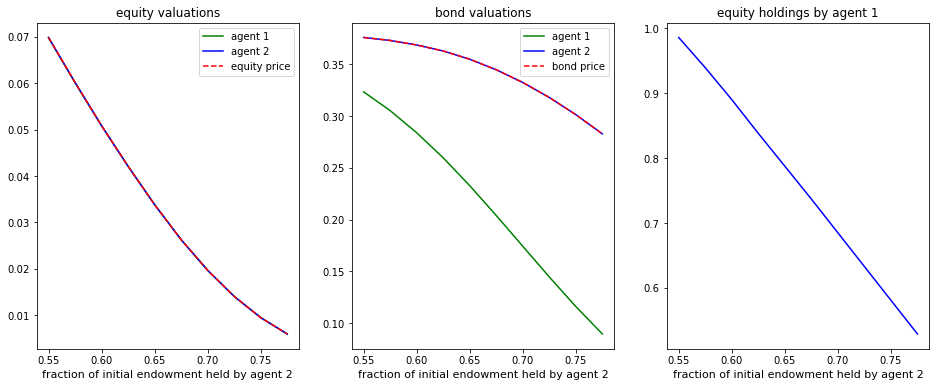

In [16]:
# Comparing the prices
fig, ax = plt.subplots(1,3,figsize=(16,6))

ax[0].plot(wlist,q1list,label='agent 1',color='green')
ax[0].plot(wlist,q2list,label='agent 2',color='blue')
ax[0].plot(wlist,qlist,label='equity price',color='red',linestyle='--')
ax[0].legend()
ax[0].set_title('equity valuations')
ax[0].set_xlabel('fraction of initial endowment held by agent 2',fontsize=11)

ax[1].plot(wlist,p1list,label='agent 1',color='green')
ax[1].plot(wlist,p2list,label='agent 2',color='blue')
ax[1].plot(wlist,plist,label='bond price',color='red',linestyle='--')
ax[1].legend()
ax[1].set_title('bond valuations')
ax[1].set_xlabel('fraction of initial endowment held by agent 2',fontsize=11)

ax[2].plot(wlist,tlist,color='blue')
ax[2].set_title('equity holdings by agent 1')
ax[2].set_xlabel('fraction of initial endowment held by agent 2',fontsize=11)

plt.show()

It is rewarding to stare at the above plots too.

In equilibrium, equity valuations are the same across the two types of
agents but bond valuations are not.

Agents of type 2 value bonds more highly (they want more hedging).

Taken together with our earlier plot of equity holdings, these graphs confirm our earlier conjecture that while both type
of agents hold equities, only agents of type 2 holds bonds.